# *** Time Evolution of States in 'Bose-Hubbard Hamiltonian (BHH)'***






# *BHH for 'N' numbers of particles in case of symmetric double potential well*


---






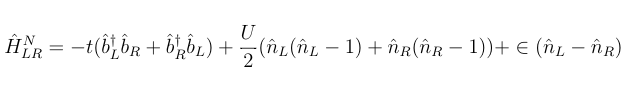

# *BH formulated matrix*


---

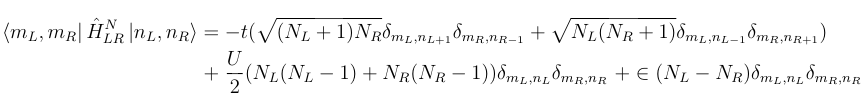

In [10]:
'''
   To import the different related libraries//
'''
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

'''
   Input parameters//
'''
Num = 50; #Number of particles//
Bias = 10**(-10); # Imbalance biasing factors//

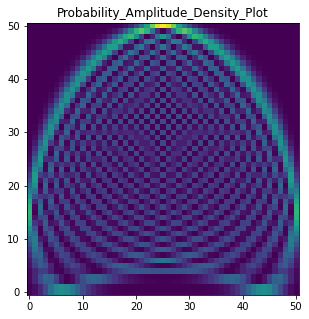

In [11]:
'''
    Interaction part//
'''
Interaction_Left = []; Interaction_Right = [] # To initialize the interaction matrices for left and right wells individually//

for i in range(Num + 1): # i.e. for the left part of potential well//
  Magnitude_Interaction_Left = (1/2)*i*(i - 1); Interaction_Left.append(Magnitude_Interaction_Left);
#print(f'Interaction Magnitudes of Left = {Interaction_Left}')

for j in range(Num + 1)[::-1]: # i.e. for the right part of potential well//
  Magnitude_Interaction_Right = (1/2)*j*(j - 1); Interaction_Right.append(Magnitude_Interaction_Right);
#print(f'Interaction Magnitude of Right = {Interaction_Right}')

Interaction_LeftRight = np.array(Interaction_Left) + np.array(Interaction_Right); # i.e. for both (left + right) potential wells//  
Interaction_Matrix = np.diag(Interaction_LeftRight); # Interaction matrix//
#print(Interaction_Matrix) 

'''
    Biasing part//
'''
Biasing_Left = []; Biasing_Right = []; # To initialize the biasing matrices for left and right wells individually//
for p in range(Num + 1): # i.e. biasing related to left//
  Magnitude_Biasing_Left = p; Biasing_Left.append(Magnitude_Biasing_Left);

for q in range(Num + 1)[::-1]: # i.e. biasing related to right//
  Magnitude_Biasing_Right = q; Biasing_Right.append(Magnitude_Biasing_Right);

Biasing_Total = Bias*(np.array(Biasing_Left) - np.array(Biasing_Right)); # i.e. imbalance related to (left + right) wells// 
Biasing_Matrix = np.diag(Biasing_Total); # Biasing matrix//
#print(Biasing_Matrix)

'''
    Tunneling part//
'''
Al_Dagger = []; Ar = [] # For the initialization of Al_Dagger and Ar //
for k in range(Num + 1):
  Al_Dagger_Magnitude = (k + 1)**(1/2); Al_Dagger.append(Al_Dagger_Magnitude); # For the magnitude of Al_Dagger//
for l in range(Num + 1)[::-1]: # For the magnitude of Ar//
  Ar_Magnitude = (l)**(1/2); Ar.append(Ar_Magnitude);

AlDaggerAr_Support = []; AlDaggerAr_Array = []; AlDaggerAr_ArrayFINAL = [];
for x in range(len(Al_Dagger)):
  for y in range(len(Ar)):
    if x == y:
      AlDaggerAr_Support = float(1*Al_Dagger[x]*Ar[y])
  AlDaggerAr_Array.append(AlDaggerAr_Support)
AlDaggerAr_ArrayFINAL = np.delete(AlDaggerAr_Array, Num) # Returns AlDaggerAr values//
#print("AlDaggerAr :", AlDaggerAr_ArrayFINAL)

ArDaggerAl_ArrayFINAL = AlDaggerAr_ArrayFINAL[::-1]; # Returns ArDaggerAl values//
#print("ArDaggerAl :", ArDaggerAl_ArrayFINAL)

Tunneling_Matrix = np.diagflat(ArDaggerAl_ArrayFINAL, 1) + np.diagflat(AlDaggerAr_ArrayFINAL, -1); # Tunneling matrix//
#print(Tunneling_Matrix)

'''
    BH Hamiltonian//
'''
BH_HamiltonianMATRIX = -Tunneling_Matrix + Interaction_Matrix + Biasing_Matrix; # Returns BH-Hamiltonian Matrix without ratio//

ratio = 3/50; Ratio = ratio*Num; # Dynamic ratio for density and spectral plot//
BH_HamiltonianMATRIX_Final = [];
SupportMatrix_1 = [[0 for t in range(Num + 1)] for u in range(Num + 1)] # i.e. support matrix for the purpose of filling elements to it//
for t in range(Num + 1):
  SupportMatrix_2 = []; # i.e. support matrix for the purpose of appending of the newly constructed vectors// 
  for u in range(Num + 1):
    if t == u:
      SupportMatrix_1 = ratio*BH_HamiltonianMATRIX[t][u];
    else:
      SupportMatrix_1 = 1*BH_HamiltonianMATRIX[t][u];
    SupportMatrix_2.append(SupportMatrix_1);
  BH_HamiltonianMATRIX_Final.append(SupportMatrix_2); 
#print("BH_HamiltonianMATRIX_Final : ", BH_HamiltonianMATRIX_Final) # Bose-Hubbard Hamiltonian matrix with dynamic ratio factor//

'''
    Exact diagonalization//
'''
EigVal, EigVec = la.eig(BH_HamiltonianMATRIX_Final);  # Returns Eigen values and Eigen vectors//

'''
    Density plot//
'''
idx = np.argsort(EigVal); EigVal_Return = EigVal[idx]; EigVec_Return = EigVec[:,idx] # Sort the Eigen values and Eigen vector accordingly//
EigVec_Return_Matrix = np.transpose(EigVec_Return)[::-1]; #print('EigVal_Return:', EigVal_Return); #print('EigVec_Return:', EigVec_Return)
Probability_Matrix = np.abs(EigVec_Return_Matrix)**2; #print('Probability_Matrix:', Probability_Matrix); #print('EigVec_Return_Matrix:', EigVec_Return_Matrix)
plt.figure(figsize = (5,5)); plt.title('Probability_Amplitude_Density_Plot')
plt.imshow(Probability_Matrix); plt.gca().invert_yaxis();

'''
    Inverse density plot//
'''
EigVec_Return_Matrix_Inverse = np.linalg.inv(EigVec_Return_Matrix[::-1]); #print('EigVec_Return_Matrix_Inverse:', EigVec_Return_Matrix_Inverse)
Inverse_Probability_Matrix = np.abs(EigVec_Return_Matrix_Inverse)**2;
#plt.figure(figsize = (5,5)); plt.title('Inverse_Probability_Amplitude_Density_Plot')
#plt.imshow(Inverse_Probability_Matrix); plt.gca().invert_yaxis()



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


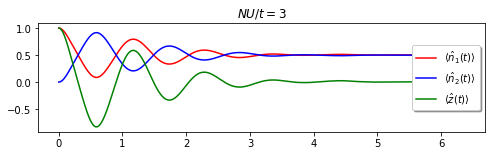

In [12]:

'''
    Evolution plot//
'''
Fock_State = 50;
Time = np.linspace(0, 20, num = 1000);
Coeff_Terms = (np.transpose(EigVec_Return_Matrix[::-1]))*np.array((EigVec_Return_Matrix_Inverse)[Fock_State]); #print('Coeff_Terms:', Coeff_Terms)

CondensateN1 = []; CondensateN2 = []; Imbalance = [];
for T in range(len(Time)):
  Support_Product_Matrix_1 = [[0 for element1 in range(Num + 1)] for element2 in range(Num + 1)]; 
  Support_Product_Matrix_3 = [];  
  for element3 in range(len(EigVal_Return)):
    Support_Product_Matrix_2 = [];
    Exponen_Terms = [1]*(Num + 1);
    for element4 in range(len(Exponen_Terms)):
      if element3 == element4:
        Support_Product_Matrix_1 = np.exp(-1j*EigVal_Return[element3]*Time[T])*Exponen_Terms[element4];
      else:
        Support_Product_Matrix_1 = 0;
      Support_Product_Matrix_2.append(Support_Product_Matrix_1);
    Support_Product_Matrix_3.append(Support_Product_Matrix_2);  
  #print('Support_Product_Matrix_3:', Support_Product_Matrix_3)
  Exponents = np.diag(Support_Product_Matrix_3);
  Exponents_Arrays_Row_Sum = np.sum((np.array(Exponents)*np.array(Coeff_Terms)), axis = 1); #print('Exponents_Arrays_Row_Sum:', Exponents_Arrays_Row_Sum);
  Support_Product_Matrix_4_CondensateN1 = np.arange(Num + 1).reshape(1, Num + 1);
  Support_Product_Matrix_4_CondensateN2 = np.arange(Num + 1)[::-1].reshape(1, Num + 1);
  CondensateN1_Arrays = Exponents_Arrays_Row_Sum*Support_Product_Matrix_4_CondensateN1; #print('CondensateN1_Arrays:', CondensateN1_Arrays)
  CondensateN2_Arrays = Exponents_Arrays_Row_Sum*Support_Product_Matrix_4_CondensateN2; #print('CondensateN2_Arrays:', CondensateN2_Arrays)
  FockState_Values_CondensateN1 = (np.sum(np.array(np.conjugate(Exponents_Arrays_Row_Sum))*np.array(CondensateN1_Arrays)))/Num; #print('FockState_Values_CondensateN1:', FockState_Values_CondensateN1)
  FockState_Values_CondensateN2 = (np.sum(np.array(np.conjugate(Exponents_Arrays_Row_Sum))*np.array(CondensateN2_Arrays)))/Num; #print('FockState_Values_CondensateN2:', FockState_Values_CondensateN2)
  Imbalance_Values = (np.array(FockState_Values_CondensateN1).real - np.array(FockState_Values_CondensateN2).real);
  CondensateN1.append(FockState_Values_CondensateN1);
  CondensateN2.append(FockState_Values_CondensateN2);
  Imbalance.append(Imbalance_Values);
#print('CondensateN1:', CondensateN1); #print('CondensateN2:', CondensateN2)

plt.figure(figsize = (8,2)); plt.plot(Time/np.pi, CondensateN1, 'r', label = '$\langle\hat{n}_1(t)\\rangle$'); 
plt.plot(Time/np.pi, CondensateN2, 'b', label = '$\langle\hat{n}_2(t)\\rangle$');  
plt.plot(Time/np.pi, Imbalance, 'g', label = '$\langle\hat{z}(t)\\rangle$'); 
plt.legend(loc = 'right', fontsize = '10', shadow=True);  
plt.title('$NU/t=%s$'%round(Ratio)); 